In [1]:
import numpy as np
from pymatgen import Composition, Element
#build NN using tensorflow
#use one hiddlen layer, calculate the error and loss
#split the dataset to about 80% 10% 10%(or less, boundry condition) as training, validation and test set.

In [2]:
#get main group elements list
with open("elements_list_main.txt", "r") as text_file:
    a=text_file.read()
main_group_list=a.split()

In [4]:
#load vectors(from SVD_20)
F=np.loadtxt('just_aed_20rep.txt')

In [5]:
#load formation energy as a dictionary
with open("formation_energy_dataset.txt", "r") as text_file:
    diction=text_file.read()
di=diction.split()
formation_dict={}
for i in range(len(di)):
    if i%2==0:
        formation_dict[di[i]]=di[i+1]

In [6]:
#build input vector(20vectors*4elements=80vectors)
#vector_input.shape=[5628,20]
vector_input=np.zeros((len(formation_dict),F.shape[1]*4))

formula_number=0
test_string_list=[]
for formula in formation_dict:
    vector=np.zeros((F.shape[1]*4))
    
    compound=Composition(formula)
    element_list=[]
    for element in compound:
        element_list.append(str(element))
    
    #sort element_list by the number of elements
    element_list_sorted=sorted(element_list,key=lambda s: compound[s])
    #build vector
    #test sort result
    formula_string=""
    element_order=0
    for element in element_list_sorted:
        formula_string+=str(element)+str(int(compound[element]))
        for j in range(len(main_group_list)):
            if str(element)==main_group_list[j]:
                #print(j)
                #print(F[j,:])
                vector[element_order*F.shape[1]:(element_order+1)*F.shape[1]]=F[j,:]
                #print(len(vector))
        element_order+=1
    #print(vector)
    vector_input[formula_number,:]=vector
    test_string_list.append(formula_string)
    formula_number+=1

#build success, input vector=vector_input 5628*80

In [7]:
vector_input.shape

(5628, 80)

In [8]:
#build formula and energy list
formula_list=[]
energy_list=[]
for formula in formation_dict:
    energy_list.append(formation_dict[formula])

for formula in test_string_list:
    formula_list.append(formula)
#build success, energy list=energy_list 5628
#build success, formula list=formula_list 5628
print(len(energy_list))
print(len(formula_list))

5628
5628


In [9]:
##store the dataset in file
#1.store the formula_list and energy_list to formation_energy_formula.txt

with open("FE_TRUE.txt", "w") as text_file:
    for i in range(len(formula_list)):
        text_file.write(formula_list[i]+" "+energy_list[i]+"\n")
        
#2. store the vector_input in SVD_20_INPUT.txt
np.savetxt("JUST_AD_INPUT.txt",vector_input)

In [10]:
#build index number list
index_list=list(range(len(formula_list)))
#shuffle index_list
np.random.shuffle(index_list)

split_percent=[0.8,0.1,0.1]
boundry1=int(len(index_list)*split_percent[0])
boundry2=int(len(index_list)*(split_percent[1]+split_percent[0]))

#build split-index matrix
traning_index=index_list[:boundry1]
validation_index=index_list[boundry1:boundry2]
test_index=index_list[boundry2:]

#test split lenth
print(len(traning_index))
print(len(validation_index))
print(len(test_index))

4502
563
563


In [ ]:
#vector=vector_input 5628*80
#energy list=energy_list 5628 (string array, to be transformed to numpy array, dtype=np.double)
#formula list=formula_list 5628

In [11]:
training_x=vector_input[traning_index,:]
validation_x=vector_input[validation_index,:]
test_x=vector_input[test_index,:]

#trasform energy_list(string list) to numpy, dtype=np.double
energy_array=np.array(energy_list,dtype=np.double)

training_y=energy_array[traning_index]
validation_y=energy_array[validation_index]
test_y=energy_array[test_index]

#training_x
#training_y
#validation_x
#validation_y
#test_x
#test_y

In [29]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, activation=tf.nn.relu),
    tf.keras.layers.Dense(1)
])
model.compile(optimizer='adam',
              loss='mae',
              metrics=['mae', 'acc'])

history=model.fit(training_x, training_y, validation_data=[validation_x,validation_y],epochs=1000)
evaluation=model.evaluate(validation_x, validation_y)

Train on 4502 samples, validate on 563 samples
Epoch 1/1000
4502/4502 [==============================] - 1s 218us/step - loss: 7.7813 - mean_absolute_error: 7.7813 - acc: 0.0000e+00 - val_loss: 7.6852 - val_mean_absolute_error: 7.6852 - val_acc: 0.0000e+00
Epoch 2/1000
4502/4502 [==============================] - 0s 65us/step - loss: 7.1354 - mean_absolute_error: 7.1354 - acc: 0.0000e+00 - val_loss: 6.9833 - val_mean_absolute_error: 6.9833 - val_acc: 0.0000e+00
Epoch 3/1000
4502/4502 [==============================] - 0s 70us/step - loss: 6.6106 - mean_absolute_error: 6.6106 - acc: 0.0000e+00 - val_loss: 6.5695 - val_mean_absolute_error: 6.5695 - val_acc: 0.0000e+00
Epoch 4/1000
4502/4502 [==============================] - 0s 86us/step - loss: 6.3350 - mean_absolute_error: 6.3350 - acc: 0.0000e+00 - val_loss: 6.3059 - val_mean_absolute_error: 6.3059 - val_acc: 0.0000e+00
Epoch 5/1000
4502/4502 [==============================] - 0s 81us/step - loss: 6.1296 - mean_absolute_error: 6.1296 

Epoch 40/1000
4502/4502 [==============================] - 0s 47us/step - loss: 4.5964 - mean_absolute_error: 4.5964 - acc: 0.0000e+00 - val_loss: 4.7414 - val_mean_absolute_error: 4.7414 - val_acc: 0.0000e+00
Epoch 41/1000
4502/4502 [==============================] - 0s 51us/step - loss: 4.5827 - mean_absolute_error: 4.5827 - acc: 0.0000e+00 - val_loss: 4.7391 - val_mean_absolute_error: 4.7391 - val_acc: 0.0000e+00
Epoch 42/1000
4502/4502 [==============================] - 0s 51us/step - loss: 4.5674 - mean_absolute_error: 4.5674 - acc: 0.0000e+00 - val_loss: 4.7148 - val_mean_absolute_error: 4.7148 - val_acc: 0.0000e+00
Epoch 43/1000
4502/4502 [==============================] - 0s 55us/step - loss: 4.5527 - mean_absolute_error: 4.5527 - acc: 0.0000e+00 - val_loss: 4.6947 - val_mean_absolute_error: 4.6947 - val_acc: 0.0000e+00
Epoch 44/1000
4502/4502 [==============================] - 0s 53us/step - loss: 4.5392 - mean_absolute_error: 4.5392 - acc: 0.0000e+00 - val_loss: 4.6802 - val_

4502/4502 [==============================] - 0s 55us/step - loss: 4.1111 - mean_absolute_error: 4.1111 - acc: 0.0000e+00 - val_loss: 4.3079 - val_mean_absolute_error: 4.3079 - val_acc: 0.0000e+00
Epoch 80/1000
4502/4502 [==============================] - 0s 52us/step - loss: 4.0986 - mean_absolute_error: 4.0986 - acc: 0.0000e+00 - val_loss: 4.2667 - val_mean_absolute_error: 4.2667 - val_acc: 0.0000e+00
Epoch 81/1000
4502/4502 [==============================] - 0s 55us/step - loss: 4.0881 - mean_absolute_error: 4.0881 - acc: 0.0000e+00 - val_loss: 4.2617 - val_mean_absolute_error: 4.2617 - val_acc: 0.0000e+00
Epoch 82/1000
4502/4502 [==============================] - 0s 52us/step - loss: 4.0810 - mean_absolute_error: 4.0810 - acc: 0.0000e+00 - val_loss: 4.2483 - val_mean_absolute_error: 4.2483 - val_acc: 0.0000e+00
Epoch 83/1000
4502/4502 [==============================] - 0s 51us/step - loss: 4.0669 - mean_absolute_error: 4.0669 - acc: 0.0000e+00 - val_loss: 4.2573 - val_mean_absolute_

Epoch 118/1000
4502/4502 [==============================] - 0s 44us/step - loss: 3.7876 - mean_absolute_error: 3.7876 - acc: 0.0000e+00 - val_loss: 4.0622 - val_mean_absolute_error: 4.0622 - val_acc: 0.0000e+00
Epoch 119/1000
4502/4502 [==============================] - 0s 53us/step - loss: 3.7769 - mean_absolute_error: 3.7769 - acc: 0.0000e+00 - val_loss: 4.0600 - val_mean_absolute_error: 4.0600 - val_acc: 0.0000e+00
Epoch 120/1000
4502/4502 [==============================] - 0s 53us/step - loss: 3.7742 - mean_absolute_error: 3.7742 - acc: 0.0000e+00 - val_loss: 4.0693 - val_mean_absolute_error: 4.0693 - val_acc: 0.0000e+00
Epoch 121/1000
4502/4502 [==============================] - 0s 69us/step - loss: 3.7723 - mean_absolute_error: 3.7723 - acc: 0.0000e+00 - val_loss: 4.0569 - val_mean_absolute_error: 4.0569 - val_acc: 0.0000e+00
Epoch 122/1000
4502/4502 [==============================] - 0s 46us/step - loss: 3.7609 - mean_absolute_error: 3.7609 - acc: 0.0000e+00 - val_loss: 4.0497 -

Epoch 157/1000
4502/4502 [==============================] - 0s 49us/step - loss: 3.6019 - mean_absolute_error: 3.6019 - acc: 0.0000e+00 - val_loss: 3.9205 - val_mean_absolute_error: 3.9205 - val_acc: 0.0000e+00
Epoch 158/1000
4502/4502 [==============================] - 0s 51us/step - loss: 3.5958 - mean_absolute_error: 3.5958 - acc: 0.0000e+00 - val_loss: 3.9052 - val_mean_absolute_error: 3.9052 - val_acc: 0.0000e+00
Epoch 159/1000
4502/4502 [==============================] - 0s 49us/step - loss: 3.5923 - mean_absolute_error: 3.5923 - acc: 0.0000e+00 - val_loss: 3.9072 - val_mean_absolute_error: 3.9072 - val_acc: 0.0000e+00
Epoch 160/1000
4502/4502 [==============================] - 0s 52us/step - loss: 3.5907 - mean_absolute_error: 3.5907 - acc: 0.0000e+00 - val_loss: 3.9087 - val_mean_absolute_error: 3.9087 - val_acc: 0.0000e+00
Epoch 161/1000
4502/4502 [==============================] - 0s 51us/step - loss: 3.5851 - mean_absolute_error: 3.5851 - acc: 0.0000e+00 - val_loss: 3.8973 -

Epoch 196/1000
4502/4502 [==============================] - 0s 50us/step - loss: 3.4723 - mean_absolute_error: 3.4723 - acc: 0.0000e+00 - val_loss: 3.8101 - val_mean_absolute_error: 3.8101 - val_acc: 0.0000e+00
Epoch 197/1000
4502/4502 [==============================] - 0s 52us/step - loss: 3.4698 - mean_absolute_error: 3.4698 - acc: 0.0000e+00 - val_loss: 3.8032 - val_mean_absolute_error: 3.8032 - val_acc: 0.0000e+00
Epoch 198/1000
4502/4502 [==============================] - 0s 51us/step - loss: 3.4739 - mean_absolute_error: 3.4739 - acc: 0.0000e+00 - val_loss: 3.8050 - val_mean_absolute_error: 3.8050 - val_acc: 0.0000e+00
Epoch 199/1000
4502/4502 [==============================] - 0s 45us/step - loss: 3.4685 - mean_absolute_error: 3.4685 - acc: 0.0000e+00 - val_loss: 3.7968 - val_mean_absolute_error: 3.7968 - val_acc: 0.0000e+00
Epoch 200/1000
4502/4502 [==============================] - 0s 52us/step - loss: 3.4650 - mean_absolute_error: 3.4650 - acc: 0.0000e+00 - val_loss: 3.8005 -

Epoch 235/1000
4502/4502 [==============================] - 0s 54us/step - loss: 3.3780 - mean_absolute_error: 3.3780 - acc: 0.0000e+00 - val_loss: 3.7047 - val_mean_absolute_error: 3.7047 - val_acc: 0.0000e+00
Epoch 236/1000
4502/4502 [==============================] - 0s 55us/step - loss: 3.3715 - mean_absolute_error: 3.3715 - acc: 0.0000e+00 - val_loss: 3.7231 - val_mean_absolute_error: 3.7231 - val_acc: 0.0000e+00
Epoch 237/1000
4502/4502 [==============================] - 0s 53us/step - loss: 3.3729 - mean_absolute_error: 3.3729 - acc: 0.0000e+00 - val_loss: 3.7078 - val_mean_absolute_error: 3.7078 - val_acc: 0.0000e+00
Epoch 238/1000
4502/4502 [==============================] - 0s 48us/step - loss: 3.3631 - mean_absolute_error: 3.3631 - acc: 0.0000e+00 - val_loss: 3.7129 - val_mean_absolute_error: 3.7129 - val_acc: 0.0000e+00
Epoch 239/1000
4502/4502 [==============================] - 0s 47us/step - loss: 3.3607 - mean_absolute_error: 3.3607 - acc: 0.0000e+00 - val_loss: 3.6977 -

Epoch 312/1000
4502/4502 [==============================] - 0s 59us/step - loss: 3.1795 - mean_absolute_error: 3.1795 - acc: 0.0000e+00 - val_loss: 3.5304 - val_mean_absolute_error: 3.5304 - val_acc: 0.0000e+00
Epoch 313/1000
4502/4502 [==============================] - 0s 54us/step - loss: 3.1756 - mean_absolute_error: 3.1756 - acc: 0.0000e+00 - val_loss: 3.5257 - val_mean_absolute_error: 3.5257 - val_acc: 0.0000e+00
Epoch 314/1000
4502/4502 [==============================] - 1s 136us/step - loss: 3.1778 - mean_absolute_error: 3.1778 - acc: 0.0000e+00 - val_loss: 3.5457 - val_mean_absolute_error: 3.5457 - val_acc: 0.0000e+00
Epoch 315/1000
4502/4502 [==============================] - 1s 116us/step - loss: 3.1682 - mean_absolute_error: 3.1682 - acc: 0.0000e+00 - val_loss: 3.5620 - val_mean_absolute_error: 3.5620 - val_acc: 0.0000e+00
Epoch 316/1000
4502/4502 [==============================] - 0s 109us/step - loss: 3.1689 - mean_absolute_error: 3.1689 - acc: 0.0000e+00 - val_loss: 3.550

Epoch 351/1000
4502/4502 [==============================] - 0s 46us/step - loss: 3.1152 - mean_absolute_error: 3.1152 - acc: 0.0000e+00 - val_loss: 3.5017 - val_mean_absolute_error: 3.5017 - val_acc: 0.0000e+00
Epoch 352/1000
4502/4502 [==============================] - 0s 53us/step - loss: 3.1059 - mean_absolute_error: 3.1059 - acc: 0.0000e+00 - val_loss: 3.4948 - val_mean_absolute_error: 3.4948 - val_acc: 0.0000e+00
Epoch 353/1000
4502/4502 [==============================] - 0s 53us/step - loss: 3.1043 - mean_absolute_error: 3.1043 - acc: 0.0000e+00 - val_loss: 3.5063 - val_mean_absolute_error: 3.5063 - val_acc: 0.0000e+00
Epoch 354/1000
4502/4502 [==============================] - 0s 52us/step - loss: 3.1004 - mean_absolute_error: 3.1004 - acc: 0.0000e+00 - val_loss: 3.4887 - val_mean_absolute_error: 3.4887 - val_acc: 0.0000e+00
Epoch 355/1000
4502/4502 [==============================] - 0s 53us/step - loss: 3.0986 - mean_absolute_error: 3.0986 - acc: 0.0000e+00 - val_loss: 3.4988 -

Epoch 390/1000
4502/4502 [==============================] - 0s 50us/step - loss: 3.0475 - mean_absolute_error: 3.0475 - acc: 0.0000e+00 - val_loss: 3.4584 - val_mean_absolute_error: 3.4584 - val_acc: 0.0000e+00
Epoch 391/1000
4502/4502 [==============================] - 0s 52us/step - loss: 3.0522 - mean_absolute_error: 3.0522 - acc: 0.0000e+00 - val_loss: 3.4517 - val_mean_absolute_error: 3.4517 - val_acc: 0.0000e+00
Epoch 392/1000
4502/4502 [==============================] - 0s 52us/step - loss: 3.0494 - mean_absolute_error: 3.0494 - acc: 0.0000e+00 - val_loss: 3.4383 - val_mean_absolute_error: 3.4383 - val_acc: 0.0000e+00
Epoch 393/1000
4502/4502 [==============================] - 0s 56us/step - loss: 3.0513 - mean_absolute_error: 3.0513 - acc: 0.0000e+00 - val_loss: 3.4500 - val_mean_absolute_error: 3.4500 - val_acc: 0.0000e+00
Epoch 394/1000
4502/4502 [==============================] - 0s 53us/step - loss: 3.0470 - mean_absolute_error: 3.0470 - acc: 0.0000e+00 - val_loss: 3.4437 -

Epoch 429/1000
4502/4502 [==============================] - 0s 55us/step - loss: 3.0085 - mean_absolute_error: 3.0085 - acc: 0.0000e+00 - val_loss: 3.4081 - val_mean_absolute_error: 3.4081 - val_acc: 0.0000e+00
Epoch 430/1000
4502/4502 [==============================] - 0s 63us/step - loss: 3.0023 - mean_absolute_error: 3.0023 - acc: 0.0000e+00 - val_loss: 3.4056 - val_mean_absolute_error: 3.4056 - val_acc: 0.0000e+00
Epoch 431/1000
4502/4502 [==============================] - 0s 55us/step - loss: 3.0048 - mean_absolute_error: 3.0048 - acc: 0.0000e+00 - val_loss: 3.4284 - val_mean_absolute_error: 3.4284 - val_acc: 0.0000e+00
Epoch 432/1000
4502/4502 [==============================] - 0s 51us/step - loss: 3.0005 - mean_absolute_error: 3.0005 - acc: 0.0000e+00 - val_loss: 3.4258 - val_mean_absolute_error: 3.4258 - val_acc: 0.0000e+00
Epoch 433/1000
4502/4502 [==============================] - 0s 52us/step - loss: 3.0012 - mean_absolute_error: 3.0012 - acc: 0.0000e+00 - val_loss: 3.3887 -

Epoch 468/1000
4502/4502 [==============================] - 0s 47us/step - loss: 2.9614 - mean_absolute_error: 2.9614 - acc: 0.0000e+00 - val_loss: 3.3860 - val_mean_absolute_error: 3.3860 - val_acc: 0.0000e+00
Epoch 469/1000
4502/4502 [==============================] - 0s 53us/step - loss: 2.9517 - mean_absolute_error: 2.9517 - acc: 0.0000e+00 - val_loss: 3.3812 - val_mean_absolute_error: 3.3812 - val_acc: 0.0000e+00
Epoch 470/1000
4502/4502 [==============================] - 0s 54us/step - loss: 2.9635 - mean_absolute_error: 2.9635 - acc: 0.0000e+00 - val_loss: 3.3750 - val_mean_absolute_error: 3.3750 - val_acc: 0.0000e+00
Epoch 471/1000
4502/4502 [==============================] - 0s 51us/step - loss: 2.9583 - mean_absolute_error: 2.9583 - acc: 0.0000e+00 - val_loss: 3.3647 - val_mean_absolute_error: 3.3647 - val_acc: 0.0000e+00
Epoch 472/1000
4502/4502 [==============================] - 0s 54us/step - loss: 2.9560 - mean_absolute_error: 2.9560 - acc: 0.0000e+00 - val_loss: 3.3709 -

Epoch 507/1000
4502/4502 [==============================] - 0s 52us/step - loss: 2.9203 - mean_absolute_error: 2.9203 - acc: 0.0000e+00 - val_loss: 3.3494 - val_mean_absolute_error: 3.3494 - val_acc: 0.0000e+00
Epoch 508/1000
4502/4502 [==============================] - 0s 50us/step - loss: 2.9155 - mean_absolute_error: 2.9155 - acc: 0.0000e+00 - val_loss: 3.3337 - val_mean_absolute_error: 3.3337 - val_acc: 0.0000e+00
Epoch 509/1000
4502/4502 [==============================] - 0s 44us/step - loss: 2.9153 - mean_absolute_error: 2.9153 - acc: 0.0000e+00 - val_loss: 3.3356 - val_mean_absolute_error: 3.3356 - val_acc: 0.0000e+00
Epoch 510/1000
4502/4502 [==============================] - 0s 52us/step - loss: 2.9128 - mean_absolute_error: 2.9128 - acc: 0.0000e+00 - val_loss: 3.3341 - val_mean_absolute_error: 3.3341 - val_acc: 0.0000e+00
Epoch 511/1000
4502/4502 [==============================] - 0s 53us/step - loss: 2.9111 - mean_absolute_error: 2.9111 - acc: 0.0000e+00 - val_loss: 3.3506 -

Epoch 546/1000
4502/4502 [==============================] - 0s 56us/step - loss: 2.8740 - mean_absolute_error: 2.8740 - acc: 0.0000e+00 - val_loss: 3.3170 - val_mean_absolute_error: 3.3170 - val_acc: 0.0000e+00
Epoch 547/1000
4502/4502 [==============================] - 0s 52us/step - loss: 2.8766 - mean_absolute_error: 2.8766 - acc: 0.0000e+00 - val_loss: 3.2815 - val_mean_absolute_error: 3.2815 - val_acc: 0.0000e+00
Epoch 548/1000
4502/4502 [==============================] - 0s 54us/step - loss: 2.8755 - mean_absolute_error: 2.8755 - acc: 0.0000e+00 - val_loss: 3.3171 - val_mean_absolute_error: 3.3171 - val_acc: 0.0000e+00
Epoch 549/1000
4502/4502 [==============================] - 0s 52us/step - loss: 2.8732 - mean_absolute_error: 2.8732 - acc: 0.0000e+00 - val_loss: 3.3397 - val_mean_absolute_error: 3.3397 - val_acc: 0.0000e+00
Epoch 550/1000
4502/4502 [==============================] - 0s 44us/step - loss: 2.8720 - mean_absolute_error: 2.8720 - acc: 0.0000e+00 - val_loss: 3.3157 -

Epoch 585/1000
4502/4502 [==============================] - 0s 51us/step - loss: 2.8385 - mean_absolute_error: 2.8385 - acc: 0.0000e+00 - val_loss: 3.2677 - val_mean_absolute_error: 3.2677 - val_acc: 0.0000e+00
Epoch 586/1000
4502/4502 [==============================] - 0s 54us/step - loss: 2.8408 - mean_absolute_error: 2.8408 - acc: 0.0000e+00 - val_loss: 3.2801 - val_mean_absolute_error: 3.2801 - val_acc: 0.0000e+00
Epoch 587/1000
4502/4502 [==============================] - 0s 53us/step - loss: 2.8297 - mean_absolute_error: 2.8297 - acc: 0.0000e+00 - val_loss: 3.2654 - val_mean_absolute_error: 3.2654 - val_acc: 0.0000e+00
Epoch 588/1000
4502/4502 [==============================] - 0s 54us/step - loss: 2.8313 - mean_absolute_error: 2.8313 - acc: 0.0000e+00 - val_loss: 3.2703 - val_mean_absolute_error: 3.2703 - val_acc: 0.0000e+00
Epoch 589/1000
4502/4502 [==============================] - 0s 51us/step - loss: 2.8342 - mean_absolute_error: 2.8342 - acc: 0.0000e+00 - val_loss: 3.2840 -

Epoch 624/1000
4502/4502 [==============================] - 0s 53us/step - loss: 2.8019 - mean_absolute_error: 2.8019 - acc: 0.0000e+00 - val_loss: 3.2409 - val_mean_absolute_error: 3.2409 - val_acc: 0.0000e+00
Epoch 625/1000
4502/4502 [==============================] - 0s 83us/step - loss: 2.7996 - mean_absolute_error: 2.7996 - acc: 0.0000e+00 - val_loss: 3.2470 - val_mean_absolute_error: 3.2470 - val_acc: 0.0000e+00
Epoch 626/1000
4502/4502 [==============================] - 0s 59us/step - loss: 2.8074 - mean_absolute_error: 2.8074 - acc: 0.0000e+00 - val_loss: 3.2209 - val_mean_absolute_error: 3.2209 - val_acc: 0.0000e+00
Epoch 627/1000
4502/4502 [==============================] - 0s 81us/step - loss: 2.7979 - mean_absolute_error: 2.7979 - acc: 0.0000e+00 - val_loss: 3.2300 - val_mean_absolute_error: 3.2300 - val_acc: 0.0000e+00
Epoch 628/1000
4502/4502 [==============================] - 0s 57us/step - loss: 2.7938 - mean_absolute_error: 2.7938 - acc: 0.0000e+00 - val_loss: 3.2400 -

Epoch 663/1000
4502/4502 [==============================] - 0s 53us/step - loss: 2.7782 - mean_absolute_error: 2.7782 - acc: 0.0000e+00 - val_loss: 3.2107 - val_mean_absolute_error: 3.2107 - val_acc: 0.0000e+00
Epoch 664/1000
4502/4502 [==============================] - 0s 65us/step - loss: 2.7724 - mean_absolute_error: 2.7724 - acc: 0.0000e+00 - val_loss: 3.2127 - val_mean_absolute_error: 3.2127 - val_acc: 0.0000e+00
Epoch 665/1000
4502/4502 [==============================] - 0s 55us/step - loss: 2.7794 - mean_absolute_error: 2.7794 - acc: 0.0000e+00 - val_loss: 3.2096 - val_mean_absolute_error: 3.2096 - val_acc: 0.0000e+00
Epoch 666/1000
4502/4502 [==============================] - 0s 52us/step - loss: 2.7712 - mean_absolute_error: 2.7712 - acc: 0.0000e+00 - val_loss: 3.2185 - val_mean_absolute_error: 3.2185 - val_acc: 0.0000e+00
Epoch 667/1000
4502/4502 [==============================] - 0s 55us/step - loss: 2.7769 - mean_absolute_error: 2.7769 - acc: 0.0000e+00 - val_loss: 3.2128 -

Epoch 702/1000
4502/4502 [==============================] - 0s 53us/step - loss: 2.7528 - mean_absolute_error: 2.7528 - acc: 0.0000e+00 - val_loss: 3.1909 - val_mean_absolute_error: 3.1909 - val_acc: 0.0000e+00
Epoch 703/1000
4502/4502 [==============================] - 0s 53us/step - loss: 2.7514 - mean_absolute_error: 2.7514 - acc: 0.0000e+00 - val_loss: 3.2025 - val_mean_absolute_error: 3.2025 - val_acc: 0.0000e+00
Epoch 704/1000
4502/4502 [==============================] - 0s 51us/step - loss: 2.7526 - mean_absolute_error: 2.7526 - acc: 0.0000e+00 - val_loss: 3.2157 - val_mean_absolute_error: 3.2157 - val_acc: 0.0000e+00
Epoch 705/1000
4502/4502 [==============================] - 0s 47us/step - loss: 2.7509 - mean_absolute_error: 2.7509 - acc: 0.0000e+00 - val_loss: 3.1783 - val_mean_absolute_error: 3.1783 - val_acc: 0.0000e+00
Epoch 706/1000
4502/4502 [==============================] - 0s 52us/step - loss: 2.7567 - mean_absolute_error: 2.7567 - acc: 0.0000e+00 - val_loss: 3.2095 -

Epoch 741/1000
4502/4502 [==============================] - 0s 55us/step - loss: 2.7295 - mean_absolute_error: 2.7295 - acc: 0.0000e+00 - val_loss: 3.1665 - val_mean_absolute_error: 3.1665 - val_acc: 0.0000e+00
Epoch 742/1000
4502/4502 [==============================] - 0s 53us/step - loss: 2.7300 - mean_absolute_error: 2.7300 - acc: 0.0000e+00 - val_loss: 3.1524 - val_mean_absolute_error: 3.1524 - val_acc: 0.0000e+00
Epoch 743/1000
4502/4502 [==============================] - 0s 52us/step - loss: 2.7321 - mean_absolute_error: 2.7321 - acc: 0.0000e+00 - val_loss: 3.1764 - val_mean_absolute_error: 3.1764 - val_acc: 0.0000e+00
Epoch 744/1000
4502/4502 [==============================] - 0s 53us/step - loss: 2.7229 - mean_absolute_error: 2.7229 - acc: 0.0000e+00 - val_loss: 3.1659 - val_mean_absolute_error: 3.1659 - val_acc: 0.0000e+00
Epoch 745/1000
4502/4502 [==============================] - 0s 52us/step - loss: 2.7217 - mean_absolute_error: 2.7217 - acc: 0.0000e+00 - val_loss: 3.1687 -

Epoch 780/1000
4502/4502 [==============================] - 0s 51us/step - loss: 2.7030 - mean_absolute_error: 2.7030 - acc: 0.0000e+00 - val_loss: 3.1545 - val_mean_absolute_error: 3.1545 - val_acc: 0.0000e+00
Epoch 781/1000
4502/4502 [==============================] - 0s 52us/step - loss: 2.7018 - mean_absolute_error: 2.7018 - acc: 0.0000e+00 - val_loss: 3.1466 - val_mean_absolute_error: 3.1466 - val_acc: 0.0000e+00
Epoch 782/1000
4502/4502 [==============================] - 0s 53us/step - loss: 2.7126 - mean_absolute_error: 2.7126 - acc: 0.0000e+00 - val_loss: 3.1408 - val_mean_absolute_error: 3.1408 - val_acc: 0.0000e+00
Epoch 783/1000
4502/4502 [==============================] - 0s 51us/step - loss: 2.7050 - mean_absolute_error: 2.7050 - acc: 0.0000e+00 - val_loss: 3.1579 - val_mean_absolute_error: 3.1579 - val_acc: 0.0000e+00
Epoch 784/1000
4502/4502 [==============================] - 0s 52us/step - loss: 2.6997 - mean_absolute_error: 2.6997 - acc: 0.0000e+00 - val_loss: 3.1805 -

Epoch 819/1000
4502/4502 [==============================] - 0s 50us/step - loss: 2.6755 - mean_absolute_error: 2.6755 - acc: 0.0000e+00 - val_loss: 3.1332 - val_mean_absolute_error: 3.1332 - val_acc: 0.0000e+00
Epoch 820/1000
4502/4502 [==============================] - 0s 54us/step - loss: 2.6753 - mean_absolute_error: 2.6753 - acc: 0.0000e+00 - val_loss: 3.1216 - val_mean_absolute_error: 3.1216 - val_acc: 0.0000e+00
Epoch 821/1000
4502/4502 [==============================] - 0s 53us/step - loss: 2.6726 - mean_absolute_error: 2.6726 - acc: 0.0000e+00 - val_loss: 3.1467 - val_mean_absolute_error: 3.1467 - val_acc: 0.0000e+00
Epoch 822/1000
4502/4502 [==============================] - 0s 55us/step - loss: 2.6680 - mean_absolute_error: 2.6680 - acc: 0.0000e+00 - val_loss: 3.1375 - val_mean_absolute_error: 3.1375 - val_acc: 0.0000e+00
Epoch 823/1000
4502/4502 [==============================] - 0s 49us/step - loss: 2.6741 - mean_absolute_error: 2.6741 - acc: 0.0000e+00 - val_loss: 3.1488 -

Epoch 858/1000
4502/4502 [==============================] - 0s 48us/step - loss: 2.6515 - mean_absolute_error: 2.6515 - acc: 0.0000e+00 - val_loss: 3.1384 - val_mean_absolute_error: 3.1384 - val_acc: 0.0000e+00
Epoch 859/1000
4502/4502 [==============================] - 0s 49us/step - loss: 2.6471 - mean_absolute_error: 2.6471 - acc: 0.0000e+00 - val_loss: 3.1208 - val_mean_absolute_error: 3.1208 - val_acc: 0.0000e+00
Epoch 860/1000
4502/4502 [==============================] - 0s 49us/step - loss: 2.6488 - mean_absolute_error: 2.6488 - acc: 0.0000e+00 - val_loss: 3.1340 - val_mean_absolute_error: 3.1340 - val_acc: 0.0000e+00
Epoch 861/1000
4502/4502 [==============================] - 0s 49us/step - loss: 2.6505 - mean_absolute_error: 2.6505 - acc: 0.0000e+00 - val_loss: 3.1133 - val_mean_absolute_error: 3.1133 - val_acc: 0.0000e+00
Epoch 862/1000
4502/4502 [==============================] - 0s 48us/step - loss: 2.6519 - mean_absolute_error: 2.6519 - acc: 0.0000e+00 - val_loss: 3.1281 -

Epoch 897/1000
4502/4502 [==============================] - 0s 68us/step - loss: 2.6331 - mean_absolute_error: 2.6331 - acc: 0.0000e+00 - val_loss: 3.1244 - val_mean_absolute_error: 3.1244 - val_acc: 0.0000e+00
Epoch 898/1000
4502/4502 [==============================] - 0s 59us/step - loss: 2.6326 - mean_absolute_error: 2.6326 - acc: 0.0000e+00 - val_loss: 3.0950 - val_mean_absolute_error: 3.0950 - val_acc: 0.0000e+00
Epoch 899/1000
4502/4502 [==============================] - 0s 63us/step - loss: 2.6349 - mean_absolute_error: 2.6349 - acc: 0.0000e+00 - val_loss: 3.0988 - val_mean_absolute_error: 3.0988 - val_acc: 0.0000e+00
Epoch 900/1000
4502/4502 [==============================] - 0s 80us/step - loss: 2.6301 - mean_absolute_error: 2.6301 - acc: 0.0000e+00 - val_loss: 3.1075 - val_mean_absolute_error: 3.1075 - val_acc: 0.0000e+00
Epoch 901/1000
4502/4502 [==============================] - 0s 69us/step - loss: 2.6278 - mean_absolute_error: 2.6278 - acc: 0.0000e+00 - val_loss: 3.1311 -

Epoch 936/1000
4502/4502 [==============================] - 0s 51us/step - loss: 2.6117 - mean_absolute_error: 2.6117 - acc: 0.0000e+00 - val_loss: 3.1316 - val_mean_absolute_error: 3.1316 - val_acc: 0.0000e+00
Epoch 937/1000
4502/4502 [==============================] - 0s 53us/step - loss: 2.6087 - mean_absolute_error: 2.6087 - acc: 0.0000e+00 - val_loss: 3.1133 - val_mean_absolute_error: 3.1133 - val_acc: 0.0000e+00
Epoch 938/1000
4502/4502 [==============================] - 0s 51us/step - loss: 2.6110 - mean_absolute_error: 2.6110 - acc: 0.0000e+00 - val_loss: 3.1099 - val_mean_absolute_error: 3.1099 - val_acc: 0.0000e+00
Epoch 939/1000
4502/4502 [==============================] - 0s 53us/step - loss: 2.6048 - mean_absolute_error: 2.6048 - acc: 0.0000e+00 - val_loss: 3.1075 - val_mean_absolute_error: 3.1075 - val_acc: 0.0000e+00
Epoch 940/1000
4502/4502 [==============================] - 0s 52us/step - loss: 2.6084 - mean_absolute_error: 2.6084 - acc: 0.0000e+00 - val_loss: 3.1049 -

Epoch 975/1000
4502/4502 [==============================] - 0s 83us/step - loss: 2.5901 - mean_absolute_error: 2.5901 - acc: 0.0000e+00 - val_loss: 3.1122 - val_mean_absolute_error: 3.1122 - val_acc: 0.0000e+00
Epoch 976/1000
4502/4502 [==============================] - 0s 95us/step - loss: 2.5904 - mean_absolute_error: 2.5904 - acc: 0.0000e+00 - val_loss: 3.0762 - val_mean_absolute_error: 3.0762 - val_acc: 0.0000e+00
Epoch 977/1000
4502/4502 [==============================] - 0s 68us/step - loss: 2.5906 - mean_absolute_error: 2.5906 - acc: 0.0000e+00 - val_loss: 3.0884 - val_mean_absolute_error: 3.0884 - val_acc: 0.0000e+00
Epoch 978/1000
4502/4502 [==============================] - 0s 73us/step - loss: 2.5859 - mean_absolute_error: 2.5859 - acc: 0.0000e+00 - val_loss: 3.0866 - val_mean_absolute_error: 3.0866 - val_acc: 0.0000e+00
Epoch 979/1000
4502/4502 [==============================] - 0s 99us/step - loss: 2.5876 - mean_absolute_error: 2.5876 - acc: 0.0000e+00 - val_loss: 3.0836 -

In [25]:
model.evaluate(validation_x, validation_y)

563/563 [==============================] - 0s 30us/step


[5.295000703042608, 5.295000703042608, 0.3374777976191912]

In [26]:
model.evaluate(test_x, test_y)

563/563 [==============================] - 0s 27us/step


[5.145813194938917, 5.145813194938917, 0.35168738909343633]

dict_keys(['val_loss', 'val_mean_absolute_error', 'val_acc', 'loss', 'mean_absolute_error', 'acc'])


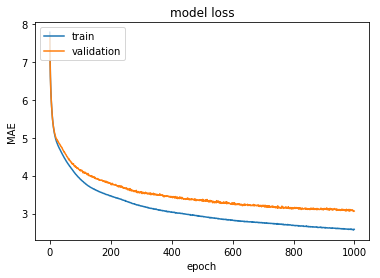

In [30]:
import matplotlib.pyplot as plt
print(history.history.keys())
'''
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
'''
# summarize history for loss
fig,ax= plt.subplots()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('MAE')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
fig.savefig("model_loss.png",format="png",dpi=1000)

In [31]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(40, activation=tf.nn.relu),
    tf.keras.layers.Dense(20, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.relu),
    tf.keras.layers.Dense(5, activation=tf.nn.relu),
    tf.keras.layers.Dense(1)
])
model.compile(optimizer=Adam(lr=0.01,decay=1e-5),
              loss='mae',
              metrics=['mae', 'acc'],
                batch=200)

history_5=model.fit(training_x, training_y, validation_data=[validation_x,validation_y],epochs=1000)
evaluation=model.evaluate(validation_x, validation_y)

Train on 4502 samples, validate on 563 samples
Epoch 1/1000
4502/4502 [==============================] - 2s 409us/step - loss: 6.1489 - mean_absolute_error: 6.1489 - acc: 0.0000e+00 - val_loss: 5.3768 - val_mean_absolute_error: 5.3768 - val_acc: 0.0000e+00
Epoch 2/1000
4502/4502 [==============================] - 0s 95us/step - loss: 5.1605 - mean_absolute_error: 5.1605 - acc: 0.0000e+00 - val_loss: 4.9970 - val_mean_absolute_error: 4.9970 - val_acc: 0.0000e+00
Epoch 3/1000
4502/4502 [==============================] - 0s 86us/step - loss: 4.8108 - mean_absolute_error: 4.8108 - acc: 0.0000e+00 - val_loss: 4.8907 - val_mean_absolute_error: 4.8907 - val_acc: 0.0000e+00
Epoch 4/1000
4502/4502 [==============================] - 0s 92us/step - loss: 4.6046 - mean_absolute_error: 4.6046 - acc: 0.0000e+00 - val_loss: 4.6735 - val_mean_absolute_error: 4.6735 - val_acc: 0.0000e+00
Epoch 5/1000
4502/4502 [==============================] - 0s 90us/step - loss: 4.3840 - mean_absolute_error: 4.3840 

Epoch 40/1000
4502/4502 [==============================] - 1s 132us/step - loss: 2.5554 - mean_absolute_error: 2.5554 - acc: 0.0000e+00 - val_loss: 3.2951 - val_mean_absolute_error: 3.2951 - val_acc: 0.0000e+00
Epoch 41/1000
4502/4502 [==============================] - 1s 135us/step - loss: 2.4784 - mean_absolute_error: 2.4784 - acc: 0.0000e+00 - val_loss: 3.3953 - val_mean_absolute_error: 3.3953 - val_acc: 0.0000e+00
Epoch 42/1000
4502/4502 [==============================] - 1s 151us/step - loss: 2.4383 - mean_absolute_error: 2.4383 - acc: 0.0000e+00 - val_loss: 3.2858 - val_mean_absolute_error: 3.2858 - val_acc: 0.0000e+00
Epoch 43/1000
4502/4502 [==============================] - 1s 147us/step - loss: 2.3864 - mean_absolute_error: 2.3864 - acc: 0.0000e+00 - val_loss: 3.2773 - val_mean_absolute_error: 3.2773 - val_acc: 0.0000e+00
Epoch 44/1000
4502/4502 [==============================] - 1s 137us/step - loss: 2.3531 - mean_absolute_error: 2.3531 - acc: 0.0000e+00 - val_loss: 3.2832 -

Epoch 79/1000
4502/4502 [==============================] - 0s 93us/step - loss: 1.7970 - mean_absolute_error: 1.7970 - acc: 0.0000e+00 - val_loss: 2.9429 - val_mean_absolute_error: 2.9429 - val_acc: 0.0000e+00
Epoch 80/1000
4502/4502 [==============================] - 1s 113us/step - loss: 1.7782 - mean_absolute_error: 1.7782 - acc: 0.0000e+00 - val_loss: 3.0018 - val_mean_absolute_error: 3.0018 - val_acc: 0.0000e+00
Epoch 81/1000
4502/4502 [==============================] - 1s 135us/step - loss: 1.8229 - mean_absolute_error: 1.8229 - acc: 0.0000e+00 - val_loss: 2.9480 - val_mean_absolute_error: 2.9480 - val_acc: 0.0000e+00
Epoch 82/1000
4502/4502 [==============================] - 1s 135us/step - loss: 1.7831 - mean_absolute_error: 1.7831 - acc: 0.0000e+00 - val_loss: 2.9563 - val_mean_absolute_error: 2.9563 - val_acc: 0.0000e+00
Epoch 83/1000
4502/4502 [==============================] - 1s 151us/step - loss: 1.7854 - mean_absolute_error: 1.7854 - acc: 0.0000e+00 - val_loss: 2.9848 - 

Epoch 118/1000
4502/4502 [==============================] - 0s 96us/step - loss: 1.5932 - mean_absolute_error: 1.5932 - acc: 0.0000e+00 - val_loss: 3.0386 - val_mean_absolute_error: 3.0386 - val_acc: 0.0000e+00
Epoch 119/1000
4502/4502 [==============================] - 1s 114us/step - loss: 1.5525 - mean_absolute_error: 1.5525 - acc: 0.0000e+00 - val_loss: 2.9168 - val_mean_absolute_error: 2.9168 - val_acc: 0.0000e+00
Epoch 120/1000
4502/4502 [==============================] - 0s 102us/step - loss: 1.5535 - mean_absolute_error: 1.5535 - acc: 0.0000e+00 - val_loss: 2.9823 - val_mean_absolute_error: 2.9823 - val_acc: 0.0000e+00
Epoch 121/1000
4502/4502 [==============================] - 1s 142us/step - loss: 1.5533 - mean_absolute_error: 1.5533 - acc: 0.0000e+00 - val_loss: 2.8912 - val_mean_absolute_error: 2.8912 - val_acc: 0.0000e+00
Epoch 122/1000
4502/4502 [==============================] - 1s 136us/step - loss: 1.5538 - mean_absolute_error: 1.5538 - acc: 0.0000e+00 - val_loss: 2.89

Epoch 157/1000
4502/4502 [==============================] - 0s 91us/step - loss: 1.4402 - mean_absolute_error: 1.4402 - acc: 0.0000e+00 - val_loss: 2.9228 - val_mean_absolute_error: 2.9228 - val_acc: 0.0000e+00
Epoch 158/1000
4502/4502 [==============================] - 0s 90us/step - loss: 1.4696 - mean_absolute_error: 1.4696 - acc: 0.0000e+00 - val_loss: 2.9056 - val_mean_absolute_error: 2.9056 - val_acc: 0.0000e+00
Epoch 159/1000
4502/4502 [==============================] - 0s 90us/step - loss: 1.4578 - mean_absolute_error: 1.4578 - acc: 0.0000e+00 - val_loss: 2.9358 - val_mean_absolute_error: 2.9358 - val_acc: 0.0000e+00
Epoch 160/1000
4502/4502 [==============================] - 0s 91us/step - loss: 1.4200 - mean_absolute_error: 1.4200 - acc: 0.0000e+00 - val_loss: 2.9419 - val_mean_absolute_error: 2.9419 - val_acc: 0.0000e+00
Epoch 161/1000
4502/4502 [==============================] - 0s 90us/step - loss: 1.4185 - mean_absolute_error: 1.4185 - acc: 0.0000e+00 - val_loss: 2.9697 -

Epoch 196/1000
4502/4502 [==============================] - 0s 91us/step - loss: 1.3091 - mean_absolute_error: 1.3091 - acc: 0.0000e+00 - val_loss: 2.9695 - val_mean_absolute_error: 2.9695 - val_acc: 0.0000e+00
Epoch 197/1000
4502/4502 [==============================] - 0s 90us/step - loss: 1.2947 - mean_absolute_error: 1.2947 - acc: 0.0000e+00 - val_loss: 2.9357 - val_mean_absolute_error: 2.9357 - val_acc: 0.0000e+00
Epoch 198/1000
4502/4502 [==============================] - 0s 90us/step - loss: 1.2919 - mean_absolute_error: 1.2919 - acc: 0.0000e+00 - val_loss: 2.8086 - val_mean_absolute_error: 2.8086 - val_acc: 0.0000e+00
Epoch 199/1000
4502/4502 [==============================] - 0s 92us/step - loss: 1.3247 - mean_absolute_error: 1.3247 - acc: 0.0000e+00 - val_loss: 2.9359 - val_mean_absolute_error: 2.9359 - val_acc: 0.0000e+00
Epoch 200/1000
4502/4502 [==============================] - 0s 91us/step - loss: 1.3003 - mean_absolute_error: 1.3003 - acc: 0.0000e+00 - val_loss: 2.8172 -

Epoch 235/1000
4502/4502 [==============================] - 0s 93us/step - loss: 1.2129 - mean_absolute_error: 1.2129 - acc: 0.0000e+00 - val_loss: 2.8742 - val_mean_absolute_error: 2.8742 - val_acc: 0.0000e+00
Epoch 236/1000
4502/4502 [==============================] - 0s 92us/step - loss: 1.2428 - mean_absolute_error: 1.2428 - acc: 0.0000e+00 - val_loss: 2.8742 - val_mean_absolute_error: 2.8742 - val_acc: 0.0000e+00
Epoch 237/1000
4502/4502 [==============================] - 0s 92us/step - loss: 1.2026 - mean_absolute_error: 1.2026 - acc: 0.0000e+00 - val_loss: 2.8233 - val_mean_absolute_error: 2.8233 - val_acc: 0.0000e+00
Epoch 238/1000
4502/4502 [==============================] - 0s 98us/step - loss: 1.2098 - mean_absolute_error: 1.2098 - acc: 0.0000e+00 - val_loss: 2.8850 - val_mean_absolute_error: 2.8850 - val_acc: 0.0000e+00
Epoch 239/1000
4502/4502 [==============================] - 0s 93us/step - loss: 1.1977 - mean_absolute_error: 1.1977 - acc: 0.0000e+00 - val_loss: 2.8923 -

Epoch 274/1000
4502/4502 [==============================] - 0s 96us/step - loss: 1.1724 - mean_absolute_error: 1.1724 - acc: 0.0000e+00 - val_loss: 2.9009 - val_mean_absolute_error: 2.9009 - val_acc: 0.0000e+00
Epoch 275/1000
4502/4502 [==============================] - 0s 98us/step - loss: 1.1440 - mean_absolute_error: 1.1440 - acc: 0.0000e+00 - val_loss: 2.9069 - val_mean_absolute_error: 2.9069 - val_acc: 0.0000e+00
Epoch 276/1000
4502/4502 [==============================] - 0s 95us/step - loss: 1.1932 - mean_absolute_error: 1.1932 - acc: 0.0000e+00 - val_loss: 2.9474 - val_mean_absolute_error: 2.9474 - val_acc: 0.0000e+00
Epoch 277/1000
4502/4502 [==============================] - 0s 98us/step - loss: 1.1429 - mean_absolute_error: 1.1429 - acc: 0.0000e+00 - val_loss: 2.8369 - val_mean_absolute_error: 2.8369 - val_acc: 0.0000e+00
Epoch 278/1000
4502/4502 [==============================] - 0s 101us/step - loss: 1.1626 - mean_absolute_error: 1.1626 - acc: 0.0000e+00 - val_loss: 2.9542 

Epoch 313/1000
4502/4502 [==============================] - 0s 95us/step - loss: 1.1028 - mean_absolute_error: 1.1028 - acc: 0.0000e+00 - val_loss: 2.9343 - val_mean_absolute_error: 2.9343 - val_acc: 0.0000e+00
Epoch 314/1000
4502/4502 [==============================] - 0s 91us/step - loss: 1.0998 - mean_absolute_error: 1.0998 - acc: 0.0000e+00 - val_loss: 2.8997 - val_mean_absolute_error: 2.8997 - val_acc: 0.0000e+00
Epoch 315/1000
4502/4502 [==============================] - 0s 91us/step - loss: 1.0999 - mean_absolute_error: 1.0999 - acc: 0.0000e+00 - val_loss: 2.9575 - val_mean_absolute_error: 2.9575 - val_acc: 0.0000e+00
Epoch 316/1000
4502/4502 [==============================] - 0s 92us/step - loss: 1.0949 - mean_absolute_error: 1.0949 - acc: 0.0000e+00 - val_loss: 2.8759 - val_mean_absolute_error: 2.8759 - val_acc: 0.0000e+00
Epoch 317/1000
4502/4502 [==============================] - 0s 93us/step - loss: 1.1113 - mean_absolute_error: 1.1113 - acc: 0.0000e+00 - val_loss: 3.0178 -

Epoch 352/1000
4502/4502 [==============================] - 1s 123us/step - loss: 1.0546 - mean_absolute_error: 1.0546 - acc: 0.0000e+00 - val_loss: 2.9078 - val_mean_absolute_error: 2.9078 - val_acc: 0.0000e+00
Epoch 353/1000
4502/4502 [==============================] - 1s 122us/step - loss: 1.0538 - mean_absolute_error: 1.0538 - acc: 0.0000e+00 - val_loss: 2.9119 - val_mean_absolute_error: 2.9119 - val_acc: 0.0000e+00
Epoch 354/1000
4502/4502 [==============================] - 1s 115us/step - loss: 1.0675 - mean_absolute_error: 1.0675 - acc: 0.0000e+00 - val_loss: 3.0094 - val_mean_absolute_error: 3.0094 - val_acc: 0.0000e+00
Epoch 355/1000
4502/4502 [==============================] - 1s 125us/step - loss: 1.0580 - mean_absolute_error: 1.0580 - acc: 0.0000e+00 - val_loss: 2.8957 - val_mean_absolute_error: 2.8957 - val_acc: 0.0000e+00
Epoch 356/1000
4502/4502 [==============================] - 1s 142us/step - loss: 1.0471 - mean_absolute_error: 1.0471 - acc: 0.0000e+00 - val_loss: 2.9

Epoch 391/1000
4502/4502 [==============================] - 0s 97us/step - loss: 1.0232 - mean_absolute_error: 1.0232 - acc: 0.0000e+00 - val_loss: 2.9497 - val_mean_absolute_error: 2.9497 - val_acc: 0.0000e+00
Epoch 392/1000
4502/4502 [==============================] - 0s 91us/step - loss: 1.0060 - mean_absolute_error: 1.0060 - acc: 0.0000e+00 - val_loss: 2.9115 - val_mean_absolute_error: 2.9115 - val_acc: 0.0000e+00
Epoch 393/1000
4502/4502 [==============================] - 0s 95us/step - loss: 1.0098 - mean_absolute_error: 1.0098 - acc: 0.0000e+00 - val_loss: 2.9679 - val_mean_absolute_error: 2.9679 - val_acc: 0.0000e+00
Epoch 394/1000
4502/4502 [==============================] - 0s 92us/step - loss: 1.0643 - mean_absolute_error: 1.0643 - acc: 0.0000e+00 - val_loss: 2.9724 - val_mean_absolute_error: 2.9724 - val_acc: 0.0000e+00
Epoch 395/1000
4502/4502 [==============================] - 0s 90us/step - loss: 1.0490 - mean_absolute_error: 1.0490 - acc: 0.0000e+00 - val_loss: 2.9999 -

Epoch 430/1000
4502/4502 [==============================] - 1s 114us/step - loss: 0.9958 - mean_absolute_error: 0.9958 - acc: 0.0000e+00 - val_loss: 2.9902 - val_mean_absolute_error: 2.9902 - val_acc: 0.0000e+00
Epoch 431/1000
4502/4502 [==============================] - 0s 100us/step - loss: 0.9886 - mean_absolute_error: 0.9886 - acc: 0.0000e+00 - val_loss: 2.9577 - val_mean_absolute_error: 2.9577 - val_acc: 0.0000e+00
Epoch 432/1000
4502/4502 [==============================] - 0s 93us/step - loss: 0.9973 - mean_absolute_error: 0.9973 - acc: 0.0000e+00 - val_loss: 2.9618 - val_mean_absolute_error: 2.9618 - val_acc: 0.0000e+00
Epoch 433/1000
4502/4502 [==============================] - 0s 95us/step - loss: 0.9873 - mean_absolute_error: 0.9873 - acc: 0.0000e+00 - val_loss: 2.9342 - val_mean_absolute_error: 2.9342 - val_acc: 0.0000e+00
Epoch 434/1000
4502/4502 [==============================] - 0s 94us/step - loss: 0.9961 - mean_absolute_error: 0.9961 - acc: 0.0000e+00 - val_loss: 2.9523

Epoch 469/1000
4502/4502 [==============================] - 1s 118us/step - loss: 0.9369 - mean_absolute_error: 0.9369 - acc: 0.0000e+00 - val_loss: 2.9408 - val_mean_absolute_error: 2.9408 - val_acc: 0.0000e+00
Epoch 470/1000
4502/4502 [==============================] - 1s 121us/step - loss: 0.9516 - mean_absolute_error: 0.9516 - acc: 0.0000e+00 - val_loss: 2.9603 - val_mean_absolute_error: 2.9603 - val_acc: 0.0000e+00
Epoch 471/1000
4502/4502 [==============================] - 0s 99us/step - loss: 0.9720 - mean_absolute_error: 0.9720 - acc: 0.0000e+00 - val_loss: 2.9475 - val_mean_absolute_error: 2.9475 - val_acc: 0.0000e+00
Epoch 472/1000
4502/4502 [==============================] - 0s 99us/step - loss: 0.9658 - mean_absolute_error: 0.9658 - acc: 0.0000e+00 - val_loss: 2.9655 - val_mean_absolute_error: 2.9655 - val_acc: 0.0000e+00
Epoch 473/1000
4502/4502 [==============================] - 0s 101us/step - loss: 0.9381 - mean_absolute_error: 0.9381 - acc: 0.0000e+00 - val_loss: 2.956

Epoch 508/1000
4502/4502 [==============================] - 1s 123us/step - loss: 0.9658 - mean_absolute_error: 0.9658 - acc: 0.0000e+00 - val_loss: 2.9632 - val_mean_absolute_error: 2.9632 - val_acc: 0.0000e+00
Epoch 509/1000
4502/4502 [==============================] - 0s 98us/step - loss: 0.9256 - mean_absolute_error: 0.9256 - acc: 0.0000e+00 - val_loss: 2.9963 - val_mean_absolute_error: 2.9963 - val_acc: 0.0000e+00
Epoch 510/1000
4502/4502 [==============================] - 1s 129us/step - loss: 0.9351 - mean_absolute_error: 0.9351 - acc: 0.0000e+00 - val_loss: 2.9722 - val_mean_absolute_error: 2.9722 - val_acc: 0.0000e+00
Epoch 511/1000
4502/4502 [==============================] - 0s 106us/step - loss: 0.9341 - mean_absolute_error: 0.9341 - acc: 0.0000e+00 - val_loss: 2.9380 - val_mean_absolute_error: 2.9380 - val_acc: 0.0000e+00
Epoch 512/1000
4502/4502 [==============================] - 0s 105us/step - loss: 0.9366 - mean_absolute_error: 0.9366 - acc: 0.0000e+00 - val_loss: 3.02

Epoch 547/1000
4502/4502 [==============================] - 0s 106us/step - loss: 0.8905 - mean_absolute_error: 0.8905 - acc: 0.0000e+00 - val_loss: 2.9546 - val_mean_absolute_error: 2.9546 - val_acc: 0.0000e+00
Epoch 548/1000
4502/4502 [==============================] - 0s 107us/step - loss: 0.9085 - mean_absolute_error: 0.9085 - acc: 0.0000e+00 - val_loss: 2.9430 - val_mean_absolute_error: 2.9430 - val_acc: 0.0000e+00
Epoch 549/1000
4502/4502 [==============================] - 0s 99us/step - loss: 0.9212 - mean_absolute_error: 0.9212 - acc: 0.0000e+00 - val_loss: 2.9521 - val_mean_absolute_error: 2.9521 - val_acc: 0.0000e+00
Epoch 550/1000
4502/4502 [==============================] - 0s 110us/step - loss: 0.9406 - mean_absolute_error: 0.9406 - acc: 0.0000e+00 - val_loss: 2.9413 - val_mean_absolute_error: 2.9413 - val_acc: 0.0000e+00
Epoch 551/1000
4502/4502 [==============================] - 0s 104us/step - loss: 0.9091 - mean_absolute_error: 0.9091 - acc: 0.0000e+00 - val_loss: 3.03

Epoch 586/1000
4502/4502 [==============================] - 0s 94us/step - loss: 0.8756 - mean_absolute_error: 0.8756 - acc: 0.0000e+00 - val_loss: 2.9487 - val_mean_absolute_error: 2.9487 - val_acc: 0.0000e+00
Epoch 587/1000
4502/4502 [==============================] - 0s 91us/step - loss: 0.8829 - mean_absolute_error: 0.8829 - acc: 0.0000e+00 - val_loss: 3.0029 - val_mean_absolute_error: 3.0029 - val_acc: 0.0000e+00
Epoch 588/1000
4502/4502 [==============================] - 0s 93us/step - loss: 0.9149 - mean_absolute_error: 0.9149 - acc: 0.0000e+00 - val_loss: 2.9914 - val_mean_absolute_error: 2.9914 - val_acc: 0.0000e+00
Epoch 589/1000
4502/4502 [==============================] - 0s 91us/step - loss: 0.8789 - mean_absolute_error: 0.8789 - acc: 0.0000e+00 - val_loss: 2.9427 - val_mean_absolute_error: 2.9427 - val_acc: 0.0000e+00
Epoch 590/1000
4502/4502 [==============================] - 0s 92us/step - loss: 0.8708 - mean_absolute_error: 0.8708 - acc: 0.0000e+00 - val_loss: 2.9703 -

Epoch 625/1000
4502/4502 [==============================] - 0s 101us/step - loss: 0.8621 - mean_absolute_error: 0.8621 - acc: 0.0000e+00 - val_loss: 2.9917 - val_mean_absolute_error: 2.9917 - val_acc: 0.0000e+00
Epoch 626/1000
4502/4502 [==============================] - 0s 96us/step - loss: 0.8602 - mean_absolute_error: 0.8602 - acc: 0.0000e+00 - val_loss: 2.9346 - val_mean_absolute_error: 2.9346 - val_acc: 0.0000e+00
Epoch 627/1000
4502/4502 [==============================] - 0s 92us/step - loss: 0.8917 - mean_absolute_error: 0.8917 - acc: 0.0000e+00 - val_loss: 2.9826 - val_mean_absolute_error: 2.9826 - val_acc: 0.0000e+00
Epoch 628/1000
4502/4502 [==============================] - 0s 96us/step - loss: 0.8515 - mean_absolute_error: 0.8515 - acc: 0.0000e+00 - val_loss: 3.0073 - val_mean_absolute_error: 3.0073 - val_acc: 0.0000e+00
Epoch 629/1000
4502/4502 [==============================] - 0s 96us/step - loss: 0.8546 - mean_absolute_error: 0.8546 - acc: 0.0000e+00 - val_loss: 2.9918 

Epoch 664/1000
4502/4502 [==============================] - 0s 71us/step - loss: 0.8425 - mean_absolute_error: 0.8425 - acc: 0.0000e+00 - val_loss: 2.9747 - val_mean_absolute_error: 2.9747 - val_acc: 0.0000e+00
Epoch 665/1000
4502/4502 [==============================] - 0s 72us/step - loss: 0.8306 - mean_absolute_error: 0.8306 - acc: 0.0000e+00 - val_loss: 3.0367 - val_mean_absolute_error: 3.0367 - val_acc: 0.0000e+00
Epoch 666/1000
4502/4502 [==============================] - 0s 74us/step - loss: 0.8409 - mean_absolute_error: 0.8409 - acc: 0.0000e+00 - val_loss: 3.0298 - val_mean_absolute_error: 3.0298 - val_acc: 0.0000e+00
Epoch 667/1000
4502/4502 [==============================] - 0s 76us/step - loss: 0.8558 - mean_absolute_error: 0.8558 - acc: 0.0000e+00 - val_loss: 3.0672 - val_mean_absolute_error: 3.0672 - val_acc: 0.0000e+00
Epoch 668/1000
4502/4502 [==============================] - 0s 71us/step - loss: 0.8650 - mean_absolute_error: 0.8650 - acc: 0.0000e+00 - val_loss: 2.9906 -

Epoch 703/1000
4502/4502 [==============================] - 0s 70us/step - loss: 0.8057 - mean_absolute_error: 0.8057 - acc: 0.0000e+00 - val_loss: 2.9961 - val_mean_absolute_error: 2.9961 - val_acc: 0.0000e+00
Epoch 704/1000
4502/4502 [==============================] - 0s 72us/step - loss: 0.8085 - mean_absolute_error: 0.8085 - acc: 0.0000e+00 - val_loss: 3.0112 - val_mean_absolute_error: 3.0112 - val_acc: 0.0000e+00
Epoch 705/1000
4502/4502 [==============================] - 0s 76us/step - loss: 0.8116 - mean_absolute_error: 0.8116 - acc: 0.0000e+00 - val_loss: 2.9894 - val_mean_absolute_error: 2.9894 - val_acc: 0.0000e+00
Epoch 706/1000
4502/4502 [==============================] - 0s 70us/step - loss: 0.8003 - mean_absolute_error: 0.8003 - acc: 0.0000e+00 - val_loss: 3.0185 - val_mean_absolute_error: 3.0185 - val_acc: 0.0000e+00
Epoch 707/1000
4502/4502 [==============================] - 0s 71us/step - loss: 0.8236 - mean_absolute_error: 0.8236 - acc: 0.0000e+00 - val_loss: 2.9768 -

Epoch 742/1000
4502/4502 [==============================] - 0s 73us/step - loss: 0.7963 - mean_absolute_error: 0.7963 - acc: 0.0000e+00 - val_loss: 2.9912 - val_mean_absolute_error: 2.9912 - val_acc: 0.0000e+00
Epoch 743/1000
4502/4502 [==============================] - 0s 70us/step - loss: 0.7953 - mean_absolute_error: 0.7953 - acc: 0.0000e+00 - val_loss: 2.9878 - val_mean_absolute_error: 2.9878 - val_acc: 0.0000e+00
Epoch 744/1000
4502/4502 [==============================] - 0s 73us/step - loss: 0.8186 - mean_absolute_error: 0.8186 - acc: 0.0000e+00 - val_loss: 3.0259 - val_mean_absolute_error: 3.0259 - val_acc: 0.0000e+00
Epoch 745/1000
4502/4502 [==============================] - 0s 70us/step - loss: 0.8022 - mean_absolute_error: 0.8022 - acc: 0.0000e+00 - val_loss: 2.9757 - val_mean_absolute_error: 2.9757 - val_acc: 0.0000e+00
Epoch 746/1000
4502/4502 [==============================] - 0s 75us/step - loss: 0.7876 - mean_absolute_error: 0.7876 - acc: 0.0000e+00 - val_loss: 2.9895 -

Epoch 781/1000
4502/4502 [==============================] - 0s 71us/step - loss: 0.7921 - mean_absolute_error: 0.7921 - acc: 0.0000e+00 - val_loss: 3.0479 - val_mean_absolute_error: 3.0479 - val_acc: 0.0000e+00
Epoch 782/1000
4502/4502 [==============================] - 0s 70us/step - loss: 0.7824 - mean_absolute_error: 0.7824 - acc: 0.0000e+00 - val_loss: 3.0618 - val_mean_absolute_error: 3.0618 - val_acc: 0.0000e+00
Epoch 783/1000
4502/4502 [==============================] - 0s 72us/step - loss: 0.7813 - mean_absolute_error: 0.7813 - acc: 0.0000e+00 - val_loss: 2.9742 - val_mean_absolute_error: 2.9742 - val_acc: 0.0000e+00
Epoch 784/1000
4502/4502 [==============================] - 0s 70us/step - loss: 0.7940 - mean_absolute_error: 0.7940 - acc: 0.0000e+00 - val_loss: 3.0464 - val_mean_absolute_error: 3.0464 - val_acc: 0.0000e+00
Epoch 785/1000
4502/4502 [==============================] - 0s 70us/step - loss: 0.7997 - mean_absolute_error: 0.7997 - acc: 0.0000e+00 - val_loss: 3.0625 -

Epoch 820/1000
4502/4502 [==============================] - 0s 72us/step - loss: 0.7980 - mean_absolute_error: 0.7980 - acc: 0.0000e+00 - val_loss: 3.0231 - val_mean_absolute_error: 3.0231 - val_acc: 0.0000e+00
Epoch 821/1000
4502/4502 [==============================] - 0s 71us/step - loss: 0.7776 - mean_absolute_error: 0.7776 - acc: 0.0000e+00 - val_loss: 3.0373 - val_mean_absolute_error: 3.0373 - val_acc: 0.0000e+00
Epoch 822/1000
4502/4502 [==============================] - 0s 69us/step - loss: 0.7770 - mean_absolute_error: 0.7770 - acc: 0.0000e+00 - val_loss: 3.0340 - val_mean_absolute_error: 3.0340 - val_acc: 0.0000e+00
Epoch 823/1000
4502/4502 [==============================] - 0s 72us/step - loss: 0.7789 - mean_absolute_error: 0.7789 - acc: 0.0000e+00 - val_loss: 2.9684 - val_mean_absolute_error: 2.9684 - val_acc: 0.0000e+00
Epoch 824/1000
4502/4502 [==============================] - 0s 72us/step - loss: 0.7709 - mean_absolute_error: 0.7709 - acc: 0.0000e+00 - val_loss: 3.0085 -

Epoch 859/1000
4502/4502 [==============================] - 0s 73us/step - loss: 0.7423 - mean_absolute_error: 0.7423 - acc: 0.0000e+00 - val_loss: 2.9974 - val_mean_absolute_error: 2.9974 - val_acc: 0.0000e+00
Epoch 860/1000
4502/4502 [==============================] - 0s 75us/step - loss: 0.7565 - mean_absolute_error: 0.7565 - acc: 0.0000e+00 - val_loss: 3.0350 - val_mean_absolute_error: 3.0350 - val_acc: 0.0000e+00
Epoch 861/1000
4502/4502 [==============================] - 0s 69us/step - loss: 0.7501 - mean_absolute_error: 0.7501 - acc: 0.0000e+00 - val_loss: 3.0477 - val_mean_absolute_error: 3.0477 - val_acc: 0.0000e+00
Epoch 862/1000
4502/4502 [==============================] - 0s 73us/step - loss: 0.7489 - mean_absolute_error: 0.7489 - acc: 0.0000e+00 - val_loss: 3.0390 - val_mean_absolute_error: 3.0390 - val_acc: 0.0000e+00
Epoch 863/1000
4502/4502 [==============================] - 0s 71us/step - loss: 0.7572 - mean_absolute_error: 0.7572 - acc: 0.0000e+00 - val_loss: 3.0521 -

4502/4502 [==============================] - 0s 77us/step - loss: 0.7611 - mean_absolute_error: 0.7611 - acc: 0.0000e+00 - val_loss: 3.0852 - val_mean_absolute_error: 3.0852 - val_acc: 0.0000e+00
Epoch 898/1000
4502/4502 [==============================] - 0s 71us/step - loss: 0.7366 - mean_absolute_error: 0.7366 - acc: 0.0000e+00 - val_loss: 3.0495 - val_mean_absolute_error: 3.0495 - val_acc: 0.0000e+00
Epoch 899/1000
4502/4502 [==============================] - 0s 78us/step - loss: 0.7484 - mean_absolute_error: 0.7484 - acc: 0.0000e+00 - val_loss: 3.0268 - val_mean_absolute_error: 3.0268 - val_acc: 0.0000e+00
Epoch 900/1000
4502/4502 [==============================] - 0s 72us/step - loss: 0.7406 - mean_absolute_error: 0.7406 - acc: 0.0000e+00 - val_loss: 3.0599 - val_mean_absolute_error: 3.0599 - val_acc: 0.0000e+00
Epoch 901/1000
4502/4502 [==============================] - 0s 71us/step - loss: 0.7586 - mean_absolute_error: 0.7586 - acc: 0.0000e+00 - val_loss: 3.0710 - val_mean_absol

Epoch 936/1000
4502/4502 [==============================] - 0s 71us/step - loss: 0.7642 - mean_absolute_error: 0.7642 - acc: 0.0000e+00 - val_loss: 3.0175 - val_mean_absolute_error: 3.0175 - val_acc: 0.0000e+00
Epoch 937/1000
4502/4502 [==============================] - 0s 72us/step - loss: 0.7261 - mean_absolute_error: 0.7261 - acc: 0.0000e+00 - val_loss: 3.1112 - val_mean_absolute_error: 3.1112 - val_acc: 0.0000e+00
Epoch 938/1000
4502/4502 [==============================] - 0s 73us/step - loss: 0.7422 - mean_absolute_error: 0.7422 - acc: 0.0000e+00 - val_loss: 3.0663 - val_mean_absolute_error: 3.0663 - val_acc: 0.0000e+00
Epoch 939/1000
4502/4502 [==============================] - 0s 73us/step - loss: 0.7375 - mean_absolute_error: 0.7375 - acc: 0.0000e+00 - val_loss: 3.0668 - val_mean_absolute_error: 3.0668 - val_acc: 0.0000e+00
Epoch 940/1000
4502/4502 [==============================] - 0s 71us/step - loss: 0.7344 - mean_absolute_error: 0.7344 - acc: 0.0000e+00 - val_loss: 3.0421 -

Epoch 975/1000
4502/4502 [==============================] - 0s 78us/step - loss: 0.7245 - mean_absolute_error: 0.7245 - acc: 0.0000e+00 - val_loss: 3.0536 - val_mean_absolute_error: 3.0536 - val_acc: 0.0000e+00
Epoch 976/1000
4502/4502 [==============================] - 0s 74us/step - loss: 0.7285 - mean_absolute_error: 0.7285 - acc: 0.0000e+00 - val_loss: 3.0129 - val_mean_absolute_error: 3.0129 - val_acc: 0.0000e+00
Epoch 977/1000
4502/4502 [==============================] - 0s 73us/step - loss: 0.7219 - mean_absolute_error: 0.7219 - acc: 0.0000e+00 - val_loss: 3.0420 - val_mean_absolute_error: 3.0420 - val_acc: 0.0000e+00
Epoch 978/1000
4502/4502 [==============================] - 0s 71us/step - loss: 0.7192 - mean_absolute_error: 0.7192 - acc: 0.0000e+00 - val_loss: 3.0337 - val_mean_absolute_error: 3.0337 - val_acc: 0.0000e+00
Epoch 979/1000
4502/4502 [==============================] - 0s 76us/step - loss: 0.7109 - mean_absolute_error: 0.7109 - acc: 0.0000e+00 - val_loss: 3.0032 -

dict_keys(['val_loss', 'val_mean_absolute_error', 'val_acc', 'loss', 'mean_absolute_error', 'acc'])


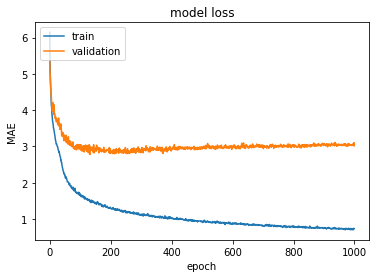

In [32]:
import matplotlib.pyplot as plt
print(history.history.keys())
'''
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
'''
# summarize history for loss
fig,ax= plt.subplots()
plt.plot(history_5.history['loss'])
plt.plot(history_5.history['val_loss'])
plt.title('model loss')
plt.ylabel('MAE')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
fig.savefig("model_loss.png",format="png",dpi=1000)